In [ ]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.torch_adapter import TorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_dataset_cfg

In [ ]:
cfg = get_dataset_cfg(WHARDatasetID.UCI_HAR)

cfg.parallelize = False
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

In [ ]:
dataset = TorchAdapter(cfg)
dataset.preprocess(force_recompute)
dataset.postprocess(split_group_index=0, force_recompute=force_recompute)

2025-10-12 21:01:55,372 - whar-datasets - INFO - Running DownloadingStep
2025-10-12 21:01:55,373 - whar-datasets - INFO - Checking hash for DownloadingStep
2025-10-12 21:01:55,373 - whar-datasets - INFO - Hash is not up to date
2025-10-12 21:01:55,374 - whar-datasets - INFO - Downloading uci_har
2025-10-12 21:02:06,454 - whar-datasets - INFO - Extracting uci_har
2025-10-12 21:02:06,866 - whar-datasets - INFO - Running ParsingStep
2025-10-12 21:02:06,866 - whar-datasets - INFO - Checking hash for ParsingStep
2025-10-12 21:02:06,867 - whar-datasets - INFO - Hash is not up to date
2025-10-12 21:02:06,867 - whar-datasets - INFO - Checking download
2025-10-12 21:02:06,867 - whar-datasets - INFO - Download exists
2025-10-12 21:02:06,867 - whar-datasets - INFO - Parsing to common format
Creating sessions: 100%|██████████| 400/400 [00:00<00:00, 565.89it/s]
2025-10-12 21:02:08,985 - whar-datasets - INFO - Saving common format
Caching sessions: 100%|██████████| 400/400 [00:00<00:00, 544.87it/s]


In [4]:
loaders = dataset.get_dataloaders(batch_size=32)

train_loader = loaders["train"]
test_loader = loaders["test"]
val_loader = loaders["val"]

In [5]:
weights = dataset.get_class_weights(test_loader)
print(weights)

{0: 0.8331002510488386, 2: 0.8548806497690696, 3: 0.9083106903796365, 1: 1.0633881253225013, 5: 1.1179208496980142, 4: 1.2223994337819406}


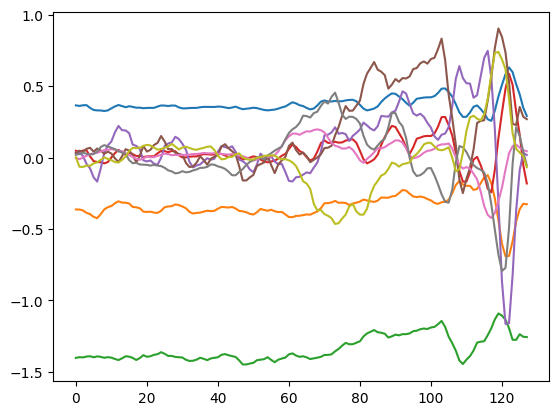

In [15]:
y_batch, x_batch = next(iter(train_loader))
x = x_batch[0].numpy()
plt.plot(x)
plt.show()